## $\text{Graph Convolutional Network}$

Graph Convolutional Layer from $\text{Semi-Supervised Classficiation with Graph Convolutional Networks}$ : https://arxiv.org/abs/1609.02907

Mathematicall it is defined as follows:  

### $$h^{(l+1)}_i = \sigma ( b^{(l)} + \sum_{j \in N(i)} \frac{1}{c_{ji}} h^{(l)}_j W^{(l)}$$

$\ $

$N(i)$는 Node $j$와 인접한 노드들의 집합을 의미하고, $c_{ji} = \sqrt{|N(j)|} \sqrt{|N(i)}$는  각 노드 차수의 root를 취한 후 곱셈을 한 것으로, $\text{Laplacian normalization}$을 의미한다.

$\ $

weight Graph인 경우 : 

### $$h^{(l+1)}_i = \sigma ( b^{(l)} + \sum_{j \in N(i)} \frac{e_{ij}}{c_{ji}} h^{(l)}_j W^{(l)})$$

In [1]:
import dgl 
import torch
from dgl.nn import GraphConv 
import networkx as nx

import torch 
from torch_geometric.data import Data
from torch_geometric.utils.convert import to_networkx

c:\Users\EonKim\anaconda3\envs\dgl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Case 1: Homogeneous Graph
g = dgl.graph(([0, 1, 2, 3, 2, 5], 
               [1, 2, 3, 4, 0, 3]))
g = dgl.add_self_loop(g) # self-connection

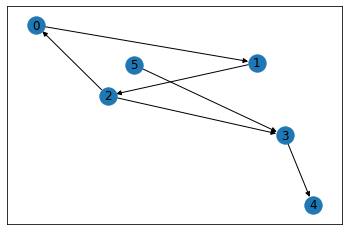

In [3]:
graph = torch.LongTensor([[0, 1, 2, 3, 2, 5], 
                          [1, 2, 3, 4, 0, 3]])

graph_data = Data(edge_index = graph, num_nodes=5)
G = to_networkx(graph_data)

nx.draw_networkx(G)

In [12]:
node_features = torch.ones(6, 10)

$\text{norm } \rightarrow \text{(optional)}, \text{How to apply the normalizer.} $

$ \text{norm='both'} \rightarrow \ \frac{1}{c_{ij}} $

$\ $

$ \text{weight : bool, (optional) : } $ 

$ \text{If True, apply a linear layer. Otherwise, aggregating the messages without a weight matrix.} $

$\ $

$ \text{allow zero in degree : bool, (optional)} $

$ \text{Graph} $에 차수가 0인 노드가 있는 경우 해당 노드에는 메세지가 전달되지 않음. ($\text{neighbors}$를 기반으로 $\text{update}$하기 때문에)

그래프 내에 $\text{degree=0}$인 노드가 존재하는 경우 $\text{DGLError}$를 출력함.

In [21]:
model = GraphConv(10, 2, norm='both', weight=True, bias = True)
res = model(g, node_features)
res

tensor([[-1.9979, -0.1263],
        [-2.1998, -0.1391],
        [-1.9979, -0.1263],
        [-2.5293, -0.1599],
        [-2.6553, -0.1679],
        [-1.5555, -0.0983]], grad_fn=<AddBackward0>)